# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json
f = open('disease_data.json', 'r')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
#Your code here
type(data)

dict

In [3]:
print(data.keys())

dict_keys(['meta', 'data'])


In [4]:
print('meta:', type(data['meta']), '| data:', type(data['data']))

meta: <class 'dict'> | data: <class 'list'>


In [5]:
print(data['meta'].keys())

dict_keys(['view'])


In [6]:
type(data['meta']['view'])

dict

In [7]:
len(data['data'])

60266

In [9]:
len(data['meta']['view']['columns'])

42

--> 60266 rows x 42 columns

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [10]:
#Your code here
import pandas as pd
df = pd.DataFrame(data['data'])
df.columns = [x['name'] for x in data['meta']['view']['columns']]
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [11]:
df[(df.Topic == 'Asthma')].Question.value_counts()

Current asthma prevalence among adults aged >= 18 years                                    870
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    870
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    870
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       870
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       870
Asthma prevalence among women aged 18-44 years                                             325
Name: Question, dtype: int64

In [12]:
cols = ['LocationAbbr', 'LocationDesc', 'Topic', 'Question', 'DataValue', 'DataValueTypeID', 'StratificationCategoryID1']
adult_ast_qst = 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma'
view = df[(df.Topic == 'Asthma') & (df.Question == adult_ast_qst)][cols]
view

,LocationAbbr,LocationDesc,Topic,Question,DataValue,DataValueTypeID,StratificationCategoryID1
10397,TX,Texas,Asthma,Influenza vaccination among noninstitutionaliz...,46.3,CRDPREV,OVERALL
10492,MD,Maryland,Asthma,Influenza vaccination among noninstitutionaliz...,44.8,CRDPREV,OVERALL
10495,AL,Alabama,Asthma,Influenza vaccination among noninstitutionaliz...,30.9,CRDPREV,OVERALL
10549,US,United States,Asthma,Influenza vaccination among noninstitutionaliz...,42,CRDPREV,OVERALL
10551,AK,Alaska,Asthma,Influenza vaccination among noninstitutionaliz...,46.5,CRDPREV,OVERALL
...,...,...,...,...,...,...,...
11426,WI,Wisconsin,Asthma,Influenza vaccination among noninstitutionaliz...,None,AGEADJPREV,RACE
11427,WY,Wyoming,Asthma,Influenza vaccination among noninstitutionaliz...,None,AGEADJPREV,RACE
11428,GU,Guam,Asthma,Influenza vaccination among noninstitutionaliz...,None,AGEADJPREV,RACE
11429,PR,Puerto Rico,Asthma,Influenza vaccination among noninstitutionaliz...,None,AGEADJPREV,RACE


In [13]:
view = df[(df.Topic == 'Asthma') 
          & (df.Question == adult_ast_qst)
          & (df.StratificationCategoryID1 == 'OVERALL')
          & (df.DataValueTypeID == 'CRDPREV')][cols]
view.DataValue = view.DataValue.astype(float)
top10 = view.sort_values('DataValue', ascending=False)[:10]
top10

,LocationAbbr,LocationDesc,Topic,Question,DataValue,DataValueTypeID,StratificationCategoryID1
10570,MA,Massachusetts,Asthma,Influenza vaccination among noninstitutionaliz...,51.6,CRDPREV,OVERALL
10588,RI,Rhode Island,Asthma,Influenza vaccination among noninstitutionaliz...,51.5,CRDPREV,OVERALL
10572,MN,Minnesota,Asthma,Influenza vaccination among noninstitutionaliz...,51.3,CRDPREV,OVERALL
10578,NH,New Hampshire,Asthma,Influenza vaccination among noninstitutionaliz...,50.6,CRDPREV,OVERALL
10583,ND,North Dakota,Asthma,Influenza vaccination among noninstitutionaliz...,46.5,CRDPREV,OVERALL
10551,AK,Alaska,Asthma,Influenza vaccination among noninstitutionaliz...,46.5,CRDPREV,OVERALL
10397,TX,Texas,Asthma,Influenza vaccination among noninstitutionaliz...,46.3,CRDPREV,OVERALL
10576,NE,Nebraska,Asthma,Influenza vaccination among noninstitutionaliz...,45.9,CRDPREV,OVERALL
10593,VT,Vermont,Asthma,Influenza vaccination among noninstitutionaliz...,45.5,CRDPREV,OVERALL
10590,SD,South Dakota,Asthma,Influenza vaccination among noninstitutionaliz...,45.2,CRDPREV,OVERALL


<ipython-input-14-85ac6476d203>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation = 45, fontsize=12)


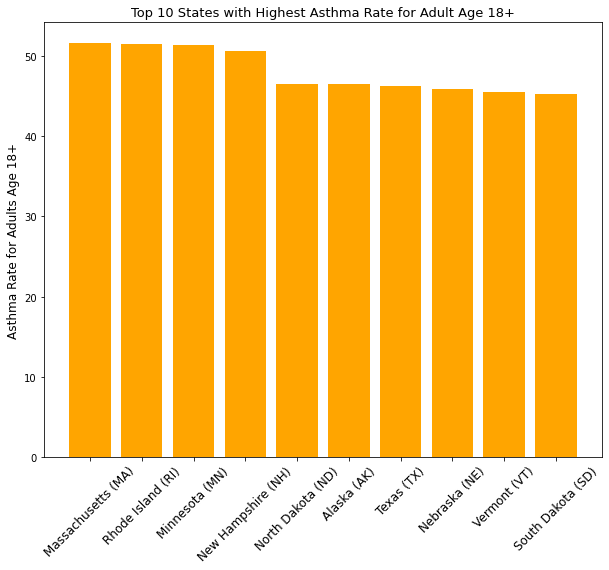

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
plt.bar(top10.LocationDesc + ' (' + top10.LocationAbbr + ')', top10.DataValue, color='orange')
plt.xticks(Rotation = 45, fontsize=12)
plt.ylabel('Asthma Rate for Adults Age 18+', fontsize=12)
plt.title('Top 10 States with Highest Asthma Rate for Adult Age 18+', fontsize=13)
plt.show()

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!